# Notebook 01 — Exploratory Data Analysis (EDA)
Student Dropout Prediction Project


In [1]:
# Cell 2 — Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Display settings
pd.set_option("display.max_columns", None)


In [4]:
# Cell 2 - Load dataset
df = pd.read_csv("data.csv", sep=";")

# Quick look
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Cell 4 — Basic info
df.info()
df.describe(include="all").T.head(20)   # top 20 rows of summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime/evening attendance\t,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous qualification (grade),4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nacionality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mother's qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Father's qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0


Missing values per column:


Marital status                    0
Application mode                  0
Application order                 0
Course                            0
Daytime/evening attendance\t      0
Previous qualification            0
Previous qualification (grade)    0
Nacionality                       0
Mother's qualification            0
Father's qualification            0
Mother's occupation               0
Father's occupation               0
Admission grade                   0
Displaced                         0
Educational special needs         0
dtype: int64

c:\projects\student_dropout\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


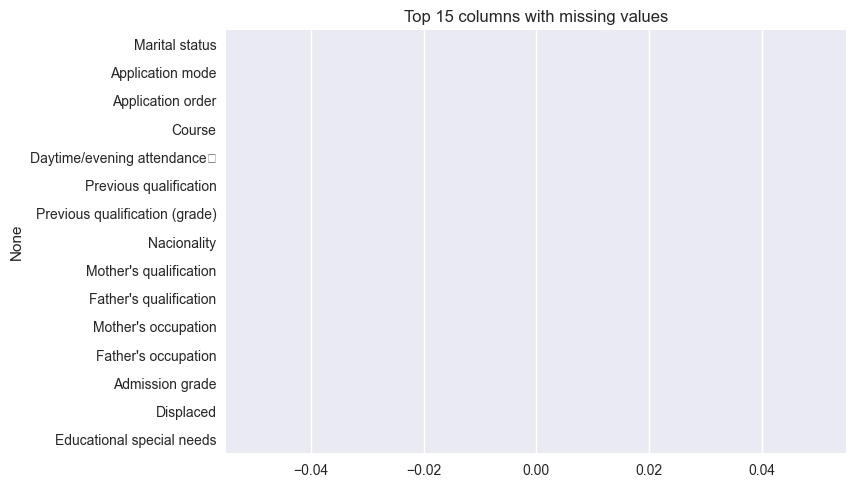

In [6]:
# Cell 5 — Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:")
display(missing.head(15))

sns.barplot(x=missing.values[:15], y=missing.index[:15])
plt.title("Top 15 columns with missing values")
plt.show()


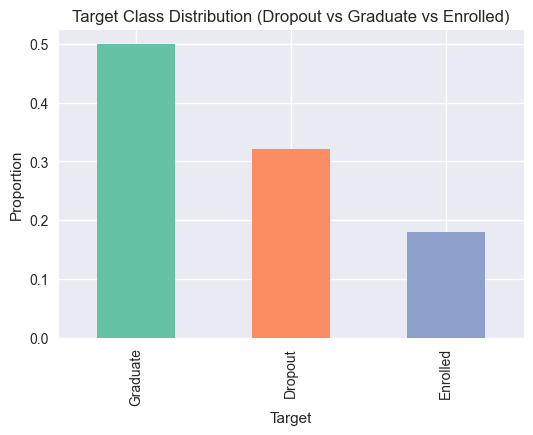

In [11]:
# Cell 6 — Target distribution
# Target distribution
df["Target"].value_counts(normalize=True).plot(
    kind="bar", figsize=(6,4), color=["#66c2a5", "#fc8d62", "#8da0cb"]
)
plt.title("Target Class Distribution (Dropout vs Graduate vs Enrolled)")
plt.ylabel("Proportion")
plt.show()


c:\projects\student_dropout\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


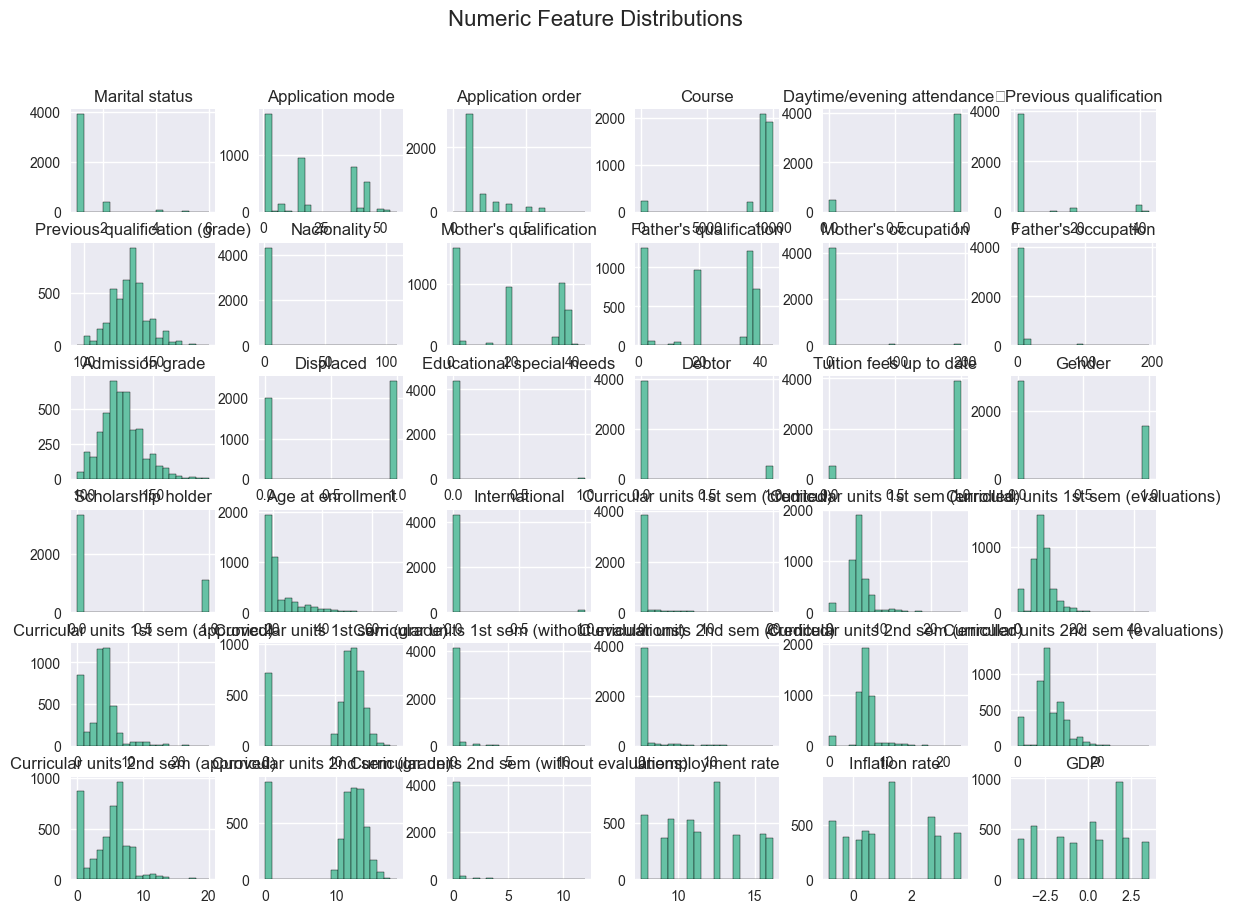

In [12]:
# Cell 7 — Numeric feature distributions
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in num_cols:
    num_cols.remove(target_col)

df[num_cols].hist(bins=20, figsize=(14,10), edgecolor="black")
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()


c:\projects\student_dropout\.venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
c:\projects\student_dropout\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


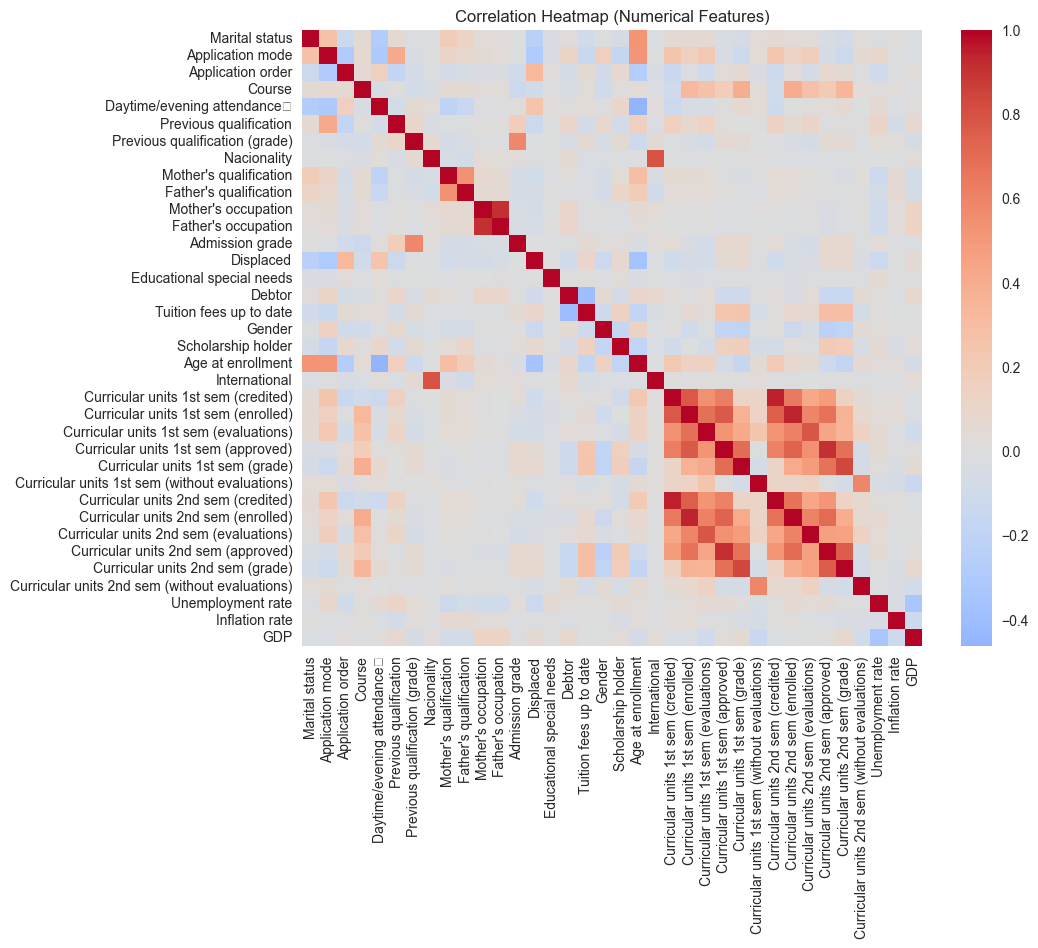

In [13]:
# Cell 8 — Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


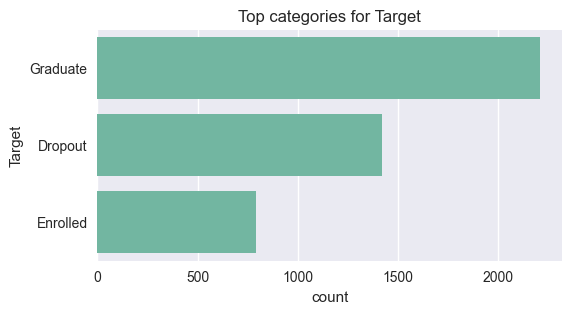

In [14]:
# Cell 9 — Categorical feature distribution (top 5)
cat_cols = df.select_dtypes(include=["object","category"]).columns.tolist()

for col in cat_cols[:5]:   # first 5 categorical features
    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
    plt.title(f"Top categories for {col}")
    plt.show()


In [15]:
# Cell 10 — Simple cleaning (optional)
# Example: drop ID-like columns, fill missing values

id_cols = [c for c in df.columns if "id" in c.lower()]
print("Dropping ID columns:", id_cols)
df = df.drop(columns=id_cols)

# Fill numeric NaN with median, categorical NaN with mode
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("After cleaning:", df.shape)


Dropping ID columns: []
After cleaning: (4424, 37)


In [16]:
# Cell 11 — Save cleaned dataset
df.to_csv("student_dropout_clean.csv", index=False)
print("Saved cleaned dataset as student_dropout_clean.csv")


Saved cleaned dataset as student_dropout_clean.csv
